In [1]:
from pathlib import Path
import json
import pandas as pd

In [2]:
data_path = Path.cwd().joinpath("DATA_FILES")
ignore_names = set(["kelsey", "chelsea", "chelsey", "kelly", "kacey", "jamie", "maleficent"])
ignore_words = set(["hope", "best", "happy", "new", "coward", "chance", "sup", "black", "tho", "angel", "elders", "may", "nanny", "couch", "soo", "irl", "hurry", "drew", "marry", "luv", "bunk", "demon", "hug", "nap", "jr", "cousin", "max", "grim", "sunny"])

In [3]:
total_results = 'total_results.json'
file = data_path.joinpath(total_results)
with open(file) as train_file:
    dict_train = json.load(train_file)

In [4]:
per_episode_file = 'children_parents_per_episode.json'
file = data_path.joinpath(per_episode_file)
with open(file) as train_file:
    per_episode = json.load(train_file)

df_per_episode = pd.DataFrame.from_dict(per_episode, orient='index')
df_per_episode

,child,parent
1,[Olive],[Marcus Flex]
2,"[Brielle, Jaime]","[Dominic Fyres, J Huntington III]"
4,"[Alexis, Miles, Renee]","[Sergio Romeo, Lars Rosewood]"
6,[Charlie],[Craig Slater]
7,[Hazel],[Kim Mingyu]
9,"[Eric, Niya, Natalie]","[Caron Simmons, Steven Smith]"
10,"[Rosé, River]",[Maria Wills]
12,"[Flynn, Cooper]",[Cayden Cross]
13,[Addi],[Yusuf Malik]
15,"[Ellie, Dorian, Theo, Tristen]","[Craig Dream Daddy, Hailey Willis]"


In [5]:
# Filter out names
filtered_dict = dict_train.copy()
number_of_episodes = len(filtered_dict)
birth_episodes = df_per_episode.index
for birth_episode in birth_episodes:
    i = int(birth_episode)
    print(i)
    to_remove = []
    to_remove.extend(df_per_episode.loc[birth_episode]["child"])
    for parent in df_per_episode.loc[birth_episode]["parent"]:
        to_remove.extend(parent.split(" "))
    for name in to_remove:
        name = name.lower()
        for episode in range(i, number_of_episodes + 1):
            if name in filtered_dict[str(episode)].keys():
                del filtered_dict[str(episode)][name]
                #print("Deleting ", name, episode)

1
2
4
6
7
9
10
12
13
15
16
17
19
21
22
23
25
29
30
34
35
36
37
38
39
40
42
44
46
47
48
50
52
55
56
57
61
62
63
64
68
69
70
71
73
74
76
77
78
79
80
81
82
83


In [6]:
df = pd.DataFrame.from_dict(filtered_dict, orient='index')
df = df.drop(columns=ignore_words)
df = df.drop(columns=ignore_names)
df            

,nancy,dominic,steph,emma,jay,yasmine,craig,ley,lili,kasey,...,felina,tarus,pacino,kydon,hundley,ambrocio,bassett,kumara,sinatra,olivar
1,117.0,97.0,84.0,38.0,23,22.0,21.0,20.0,19.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10.0,NaN,6.0,24.0,13,1.0,10.0,15.0,22.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23.0,NaN,4.0,67.0,19,3.0,49.0,10.0,14.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13.0,NaN,4.0,151.0,18,4.0,88.0,20.0,9.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,12.0,NaN,11.0,49.0,7,3.0,125.0,5.0,5.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,NaN,NaN,NaN,12.0,10,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,3.0,NaN,NaN,23.0,8,2.0,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,1.0,NaN,NaN,NaN,3,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,2.0,NaN,1.0,NaN,2,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
episodes = [x for x in range(1, 84)]
counts = []
names = []
for i in range(83):
    top_name = dict(df.iloc[i].sort_values(ascending=False, na_position='last').head(1))
    print(top_name)
    counts.append(list(top_name.values())[0])
    names.append(list(top_name.keys())[0])
print(episodes)
print(counts)
print(names)

{'nancy': 117.0}
{'sergio': 219.0}
{'kim': 187.0}
{'emma': 151.0}
{'craig': 125.0}
{'kim': 423.0}
{'emma': 150.0}
{'emma': 140.0}
{'emma': 2025.0}
{'emma': 669.0}
{'alex': 275.0}
{'emma': 464.0}
{'emma': 484.0}
{'gavin': 546.0}
{'gavin': 425.0}
{'luna': 408.0}
{'luna': 251.0}
{'lily': 139.0}
{'emma': 120.0}
{'luna': 120.0}
{'luna': 433.0}
{'luna': 420.0}
{'luna': 341.0}
{'harry': 267.0}
{'tegan': 227.0}
{'lily': 54.0}
{'cameron': 51.0}
{'shawn': 52.0}
{'emma': 125.0}
{'emma': 200.0}
{'alex': 130.0}
{'luna': 91.0}
{'teal': 151.0}
{'harry': 137.0}
{'luna': 111.0}
{'leo': 342.0}
{'violet': 518.0}
{'lily': 292.0}
{'tom': 1381.0}
{'harriet': 311.0}
{'harriet': 51.0}
{'jack': 90.0}
{'remus': 126.0}
{'chandler': 69.0}
{'rachel': 78.0}
{'luke': 66.0}
{'jack': 55.0}
{'noelle': 80.0}
{'luke': 56.0}
{'jasmine': 58.0}
{'alex': 59.0}
{'corona': 83.0}
{'alex': 32.0}
{'lily': 36.0}
{'ryder': 175.0}
{'luna': 24.0}
{'liam': 43.0}
{'lily': 29.0}
{'lily': 17.0}
{'luna': 24.0}
{'luna': 64.0}
{'emma': 36.0

In [8]:
df_sum = df.sum(axis = 0, skipna = True)
df_sum = df_sum.sort_values(ascending=False, na_position='last')
df_sum.head(30)

emma       9778.0
alex       9381.0
lily       9011.0
luna       8660.0
jack       8328.0
noah       7509.0
emily      6628.0
james      6626.0
luke       6475.0
sam        6006.0
rose       5942.0
liam       5888.0
grace      5573.0
mia        5518.0
leo        5430.0
ava        5388.0
oliver     5336.0
ryan       5245.0
jackson    5243.0
jacob      5140.0
chloe      5015.0
ella       4914.0
lucas      4913.0
olivia     4879.0
harry      4810.0
daniel     4801.0
ethan      4760.0
anna       4502.0
tyler      4466.0
mason      4402.0
dtype: float64

In [9]:
#for plotting images & adjusting colors
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

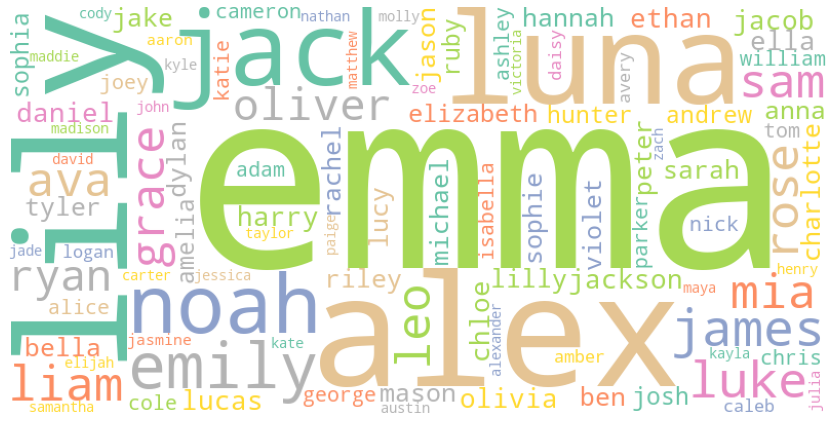

In [10]:
top_dict = df_sum.head(100).to_dict()
# create the WordCloud object
wordcloud = WordCloud(min_word_length =3,
                      background_color='white', width = 800, height = 400, colormap="Set2")

# generate the word cloud
wordcloud.generate_from_frequencies(top_dict)
#plot
fig, ax = plt.subplots(figsize=(18, 6)) 
ax.imshow(wordcloud)
ax.axis('off')
plt.tight_layout()
plt.show()

In [46]:

import plotly.graph_objects as go
fig = go.Figure(data=[go.Table(
    columnwidth = [15,60,25],
    header=dict(values=['Episode', 'Top name', '# of mentions'], align=['right','center', 'left']),
    cells=dict(values=[episodes, [name.capitalize() for name in names], counts], align=['right','center', 'left'],))
                     ])
fig.update_layout(width=500, height=1700)
fig['layout'].update(margin=dict(l=0,r=0,b=0,t=0))
fig.write_image(str(data_path.joinpath("topforallepisodes.png")))
#fig.show()

In [42]:
df_sum.head(10)

emma     9778.0
alex     9381.0
lily     9011.0
luna     8660.0
jack     8328.0
noah     7509.0
emily    6628.0
james    6626.0
luke     6475.0
sam      6006.0
dtype: float64

In [41]:
names_sum = list(dict(df_sum.head(10)).keys())
counts_sum = list(dict(df_sum.head(10)).values())
print(names_sum)
print(counts_sum)
fig = go.Figure(data=[go.Table(
    columnwidth = [10,50,40],
    header=dict(values=['','Name', '# of mentions'], align=['left', 'center', 'left']),
    cells=dict(values=[[x for x in range(1, 11)],[name.capitalize() for name in names_sum], counts_sum], align=['left', 'center', 'left'],))
                     ])
fig.update_layout(width=300, height=310)
fig['layout'].update(margin=dict(l=0,r=0,b=0,t=0))
#fig.write_image(str(data_path.joinpath("top10names.png")))
fig.show()

['emma', 'alex', 'lily', 'luna', 'jack', 'noah', 'emily', 'james', 'luke', 'sam']
[9778.0, 9381.0, 9011.0, 8660.0, 8328.0, 7509.0, 6628.0, 6626.0, 6475.0, 6006.0]
